### pandas basics

In [1]:
import pandas as pd
pd.DataFrame([[30, 21]], columns=['Apples', 'Bananas'])

,Apples,Bananas
0,30,21


In [2]:
pd.DataFrame([[35,21], [41,34]], index=['2017 Sales', '2018 Sales'], columns=['Apples', 'Bananas'])

,Apples,Bananas
2017 Sales,35,21
2018 Sales,41,34


In [33]:
quantities = ['4 cups', '1 cup', '2 large', '1 can']
items = ['Flour', 'Milk', 'Eggs', 'Spam']
ingredients = pd.Series(quantities, index=items, name='Dinner')
ingredients

Flour     4 cups
Milk       1 cup
Eggs     2 large
Spam       1 can
Name: Dinner, dtype: object

In [ ]:
dfn = df.apply(lambda x: type(x))

In [ ]:
pd.read_csv('../input/wine-reviews/winemag-data_first150k.csv', index_col=0)

In [8]:
pd.DataFrame({'Cows': [12, 20], 'Goats': [22, 19]}, index=['Year 1', 'Year 2'])

,Cows,Goats
Year 1,12,22
Year 2,20,19


In [ ]:
import sqlite3
conn = sqlite3.connect("../input/pitchfork-data/database.sqlite")
music_reviews = pd.read_sql_query("SELECT * FROM artists", conn)

In [ ]:
sample_reviews = reviews.loc[[1, 2, 3, 5, 8]]
df = reviews.loc[[0, 1, 10, 100], ['country', 'province', 'region_1', 'region_2']]
df = reviews.loc[0:99,['country', 'variety']]
cols = ['country', 'variety']
df = reviews.head(100).loc[:,cols]
italian_wines = reviews[reviews.country == 'Italy']
reviews[(reviews.country.isin(['Australia', 'New Zealand'])) & (reviews.points >=95)] 

### analyzing star war movie data

In [5]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")
star_wars.head(10)
star_wars.columns
star_wars = star_wars[star_wars['RespondentID'].notnull()]

### change valeus to True and False

In [ ]:
yes_no = { "Yes": True, "No": False, np.NaN: False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']\
= star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']\
= star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars.head(3)

In [ ]:
star_wars.columns

In [ ]:
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'] \
= star_wars['Which of the following Star Wars films have you seen? Please select all that apply.']\
.map({'Star Wars: Episode I  The Phantom Menace': True, np.NaN: False})
star_wars['Unnamed: 4'] = star_wars['Unnamed: 4'].map({'Star Wars: Episode II  Attack of the Clones': True, np.NaN: False})
star_wars['Unnamed: 5'] = star_wars['Unnamed: 5'].map({'Star Wars: Episode III  Revenge of the Sith': True, np.NaN: False})
star_wars['Unnamed: 6'] = star_wars['Unnamed: 6'].map({'Star Wars: Episode IV  A New Hope': True, np.NaN: False})
star_wars['Unnamed: 7'] = star_wars['Unnamed: 7'].map({'Star Wars: Episode V The Empire Strikes Back': True, np.NaN: False})
star_wars['Unnamed: 8'] = star_wars['Unnamed: 8'].map({'Star Wars: Episode VI Return of the Jedi': True, np.NaN: False})
star_wars.head(2)

### rename columns, change data types

In [ ]:
star_wars.columns[3:9]

In [ ]:
star_wars=star_wars.rename(columns = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',\
                                    'Unnamed: 4':'seen_2', \
                                    'Unnamed: 5':'seen_3', \
                                    'Unnamed: 6': 'seen_4', \
                                    'Unnamed: 7': 'seen_5', \
                                    'Unnamed: 8': 'seen_6'})
star_wars.head(2)

In [ ]:
# vonverting ranking values to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [ ]:
star_wars.columns[9:15]

In [ ]:
star_wars = star_wars.rename(columns = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',\
                                    'Unnamed: 10': 'ranking_2',\
                                    'Unnamed: 11': 'ranking_3',\
                                    'Unnamed: 12': 'ranking_4',\
                                    'Unnamed: 13': 'ranking_5',\
                                    'Unnamed: 14': 'ranking_6'})

## compute mean, sum and plot both

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_two(c1, c2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
    width = 0.3
    
    df = pd.concat([c1, c2], axis = 1)
    df = df.rename({0: 'c1', 1: 'c2'}, axis = 1)
    df.c1.plot(kind='bar', color='red', ax = ax, width = width, position = 1)
    df.c2.plot(kind='bar', color='blue', ax = ax2, width = width, position = 0)

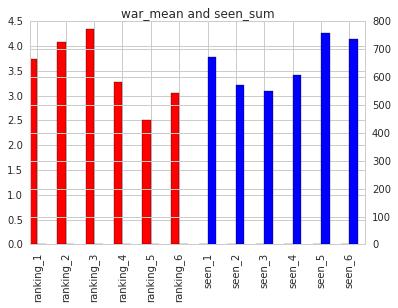

In [158]:
# the mean of each of the ranking columns
war_mean = star_wars.mean()[9:15]
# number of people who have seen the movies
seen_sum = star_wars.sum()[3:9]
plot_two(war_mean, seen_sum)
plt.title('war_mean and seen_sum')

### split and analyze data in different groups

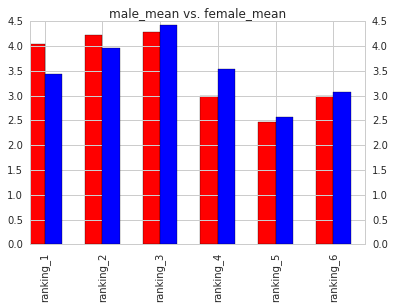

In [159]:
# males vs females
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

# ranking
male_mean = males.mean()[9:15]
female_mean = females.mean()[9:15]
plot_two(male_mean, female_mean)
plt.title('male_mean vs. female_mean')

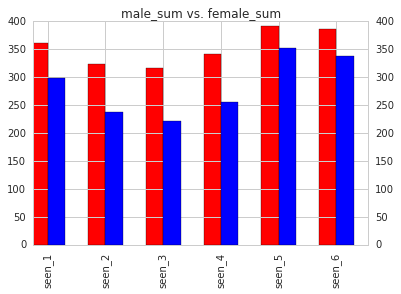

In [160]:
# number of people who have seen the movies
male_sum=males.sum()[3:9]
female_sum=females.sum()[3:9]
plot_two(male_sum, female_sum)
plt.title('male_sum vs. female_sum')

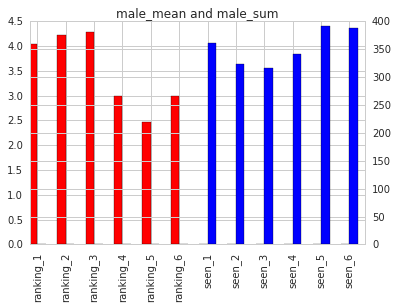

In [161]:
plot_two(male_mean, male_sum)
plt.title('male_mean and male_sum')

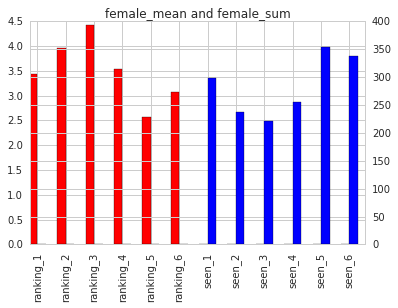

In [162]:
plot_two(female_mean, female_sum)
plt.title('female_mean and female_sum')

### StarWars fans/nonfans vs. StarTrek fans/nonfans

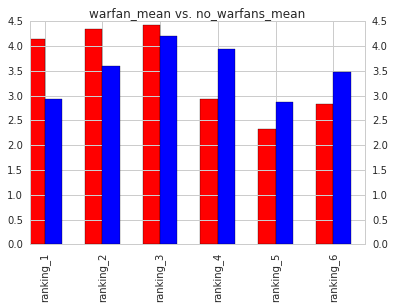

In [165]:
warfans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
no_warfans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]
# ranking
warfan_mean=warfans.mean()[9:15]
no_warfans_mean=no_warfans.mean()[9:15]
plot_two(warfan_mean, no_warfans_mean)
plt.title('warfan_mean vs. no_warfans_mean')

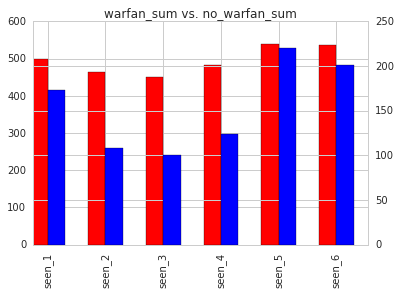

In [167]:
# number of people who watched StarWars movies
warfan_sum= warfans.sum()[3:9]
no_warfan_sum= no_warfans.sum()[3:9]
plot_two(warfan_sum, no_warfan_sum)
plt.title('warfan_sum vs. no_warfan_sum')

In [199]:
age_mean = star_wars.groupby('Age').mean()
age_mean

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Age,,,,,,,,,,,,,,,
18-29,3.290464e+09,0.825688,0.568807,0.733945,0.678899,0.665138,0.697248,0.733945,0.733945,4.100000,4.100000,3.966667,2.994444,2.722222,3.116667
30-44,3.290218e+09,0.772388,0.559701,0.652985,0.589552,0.567164,0.656716,0.735075,0.735075,4.347826,4.309179,4.475728,2.932367,2.212560,2.714976
45-60,3.289923e+09,0.824742,0.529210,0.621993,0.508591,0.487973,0.567010,0.756014,0.721649,3.541667,4.170833,4.537500,3.308333,2.437500,3.004167
> 60,3.290001e+09,0.717472,0.420074,0.531599,0.394052,0.371747,0.386617,0.624535,0.587361,3.010417,3.761658,4.316062,3.808290,2.730570,3.357513


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


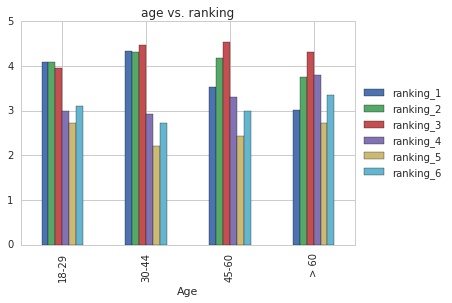

In [212]:
age_mean.plot.bar(y=['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6'])
plt.title('age vs. ranking')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


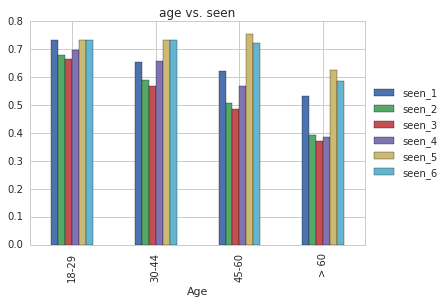

In [213]:
age_mean.plot.bar(y=['seen_1','seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'])
plt.title('age vs. seen')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [216]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


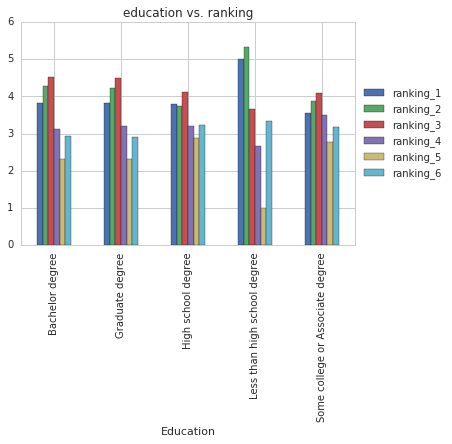

In [219]:
education_mean=star_wars.groupby('Education').mean()
education_mean.plot.bar(y=['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6'])
plt.title('education vs. ranking')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


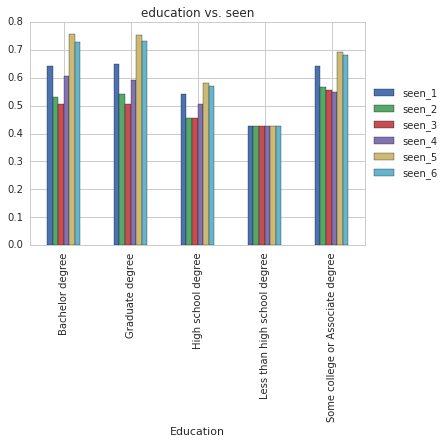

In [221]:
education_mean.plot.bar(y=['seen_1','seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'])
plt.title('education vs. seen')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### AnalyIng data on New York City public schools

In [170]:
import pandas as pd
import numpy
import re

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d
    
print('ap_2010:', data['ap_2010'].shape)
print('class_size:', data['class_size'].shape)
print('demographics:', data['demographics'].shape)
print('graduation:', data['graduation'].shape)
print('hs_directory:', data['hs_directory'].shape)
print('sat_results:', data['sat_results'].shape)

ap_2010: (258, 5)
class_size: (27611, 16)
demographics: (10075, 38)
graduation: (25096, 23)
hs_directory: (435, 58)
sat_results: (478, 6)


# Read in the surveys

In [171]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)

survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey
survey.shape

(1702, 23)

# Add DBN columns

In [172]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
data['class_size'].info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 18 columns):
CSD                                     27611 non-null int64
BOROUGH                                 27611 non-null object
SCHOOL CODE                             27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    26127 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     26127 non-null object
SERVICE CATEGORY(K-9* ONLY)             26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED       26127 non-null float64
NUMBER OF SECTIONS                      26127 non-null float64
AVERAGE CLASS SIZE                      26127 non-null float64
SIZE OF SMALLEST CLASS                  26127 non-null float64
SIZE OF LARGEST CLASS                   26127 non-null float64
DATA SOURCE        

# Convert columns to numeric

In [173]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]
print('data[sat_results]', data['sat_results'].shape)

def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")
print('data[hs_directory]', data['hs_directory'].shape)

data[sat_results] (478, 7)
data[hs_directory] (435, 61)


# Condense datasets

In [174]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
print('data["graduation"]', data["graduation"].shape)

data["graduation"] (405, 23)


# Convert AP scores to numeric

In [175]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

# Combine datasets

In [176]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")
print('combined.shape pre-inner', combined.shape, '\n')

print('data["class_size"]:  ', data["class_size"].shape)
print('data["demographics"]:', data["demographics"].shape)
print('data["survey"]:      ', data["survey"].shape)
print('data["hs_directory"]:', data["hs_directory"].shape)
print('')

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")
    print('combined-steps', combined.shape)

combined = combined.fillna(combined.mean())
print('\ncombined.shape', combined.shape)
combined = combined.fillna(0)
print('\ncombined.shape', combined.shape)

combined.shape pre-inner (479, 33) 

data["class_size"]:   (583, 8)
data["demographics"]: (1509, 38)
data["survey"]:       (1702, 23)
data["hs_directory"]: (435, 61)

combined-steps (435, 40)
combined-steps (435, 77)
combined-steps (435, 99)
combined-steps (363, 159)

combined.shape (363, 159)

combined.shape (363, 159)


# Add a school district column for mapping

In [177]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)
combined.shape

(363, 160)

# Find  and plot correlations

In [178]:
correlations = combined.corr()
print(correlations.shape)
print(correlations["sat_score"].head(2))

(67, 67)
SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
Name: sat_score, dtype: float64


In [179]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")
print(survey_fields)

['rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11', 'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11']


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


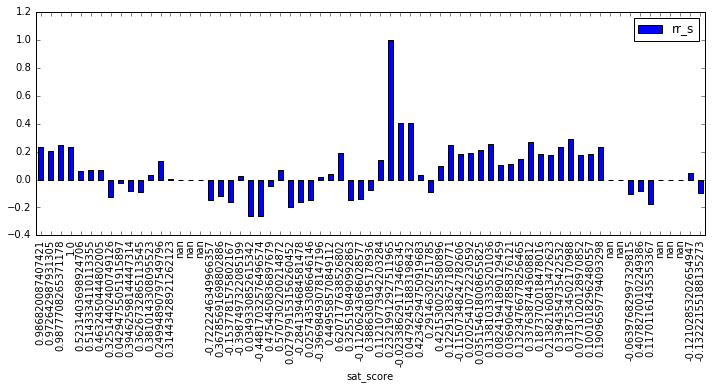

In [107]:
%matplotlib inline
correlations.plot.bar(x=["sat_score"], y=['rr_s'], figsize=(12,4))

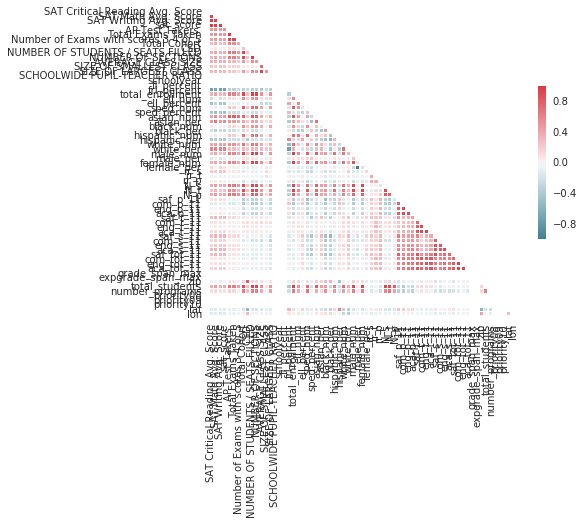

In [114]:
import seaborn as sns
def plot_correlation_heatmap(corr):
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plot_correlation_heatmap(correlations)

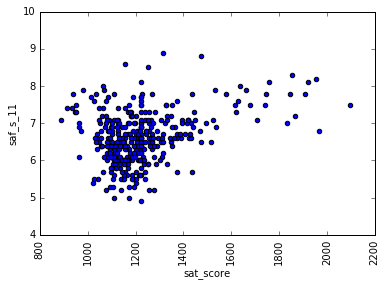

In [98]:
combined.plot.scatter(x='sat_score', y='saf_s_11', rot=90)

# Mapping out safety scores

In [99]:
import numpy as np
sch_dist_mean=combined.groupby('school_dist').agg(np.mean)
sch_dist_mean.head(2)

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,...,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
school_dist,,,,,,,,,,,,,,,,,,,,,
01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,115.244241,...,12.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,40.719022,-73.982377
02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,149.818949,...,12.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,40.739699,-73.991386


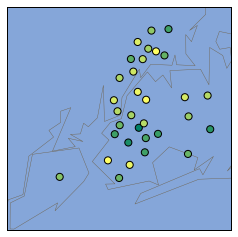

In [100]:
from mpl_toolkits.basemap import Basemap
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
longitudes=sch_dist_mean['lon'].tolist()
latitudes=sch_dist_mean['lat'].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=sch_dist_mean['saf_s_11'], cmap="summer")

# more analysis

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


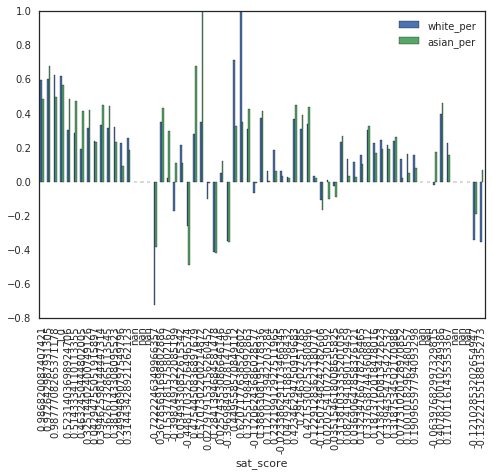

In [116]:
correlations.plot.bar(x='sat_score',y=['white_per', 'asian_per'])

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


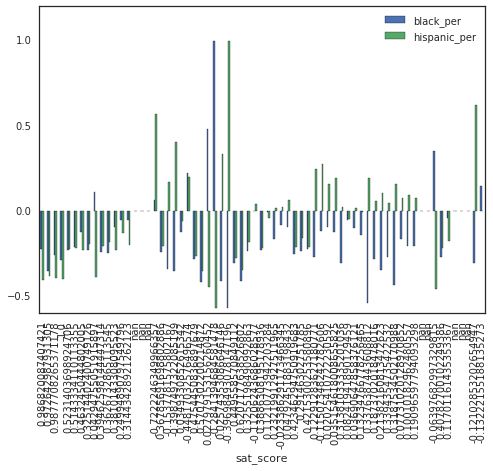

In [117]:
correlations.plot.bar(x='sat_score', y=['black_per', 'hispanic_per'])

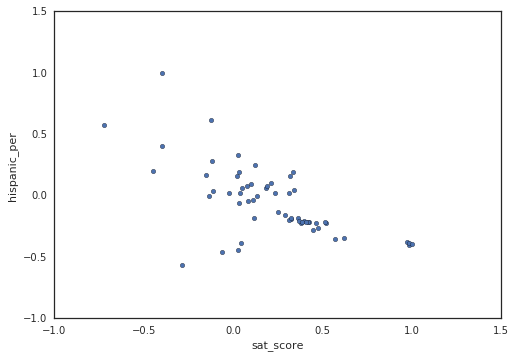

In [139]:
correlations.plot.scatter(x='sat_score', y='hispanic_per')

In [220]:
combined[combined['hispanic_per'] > 95]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist
44,02M542,MANHATTAN BRIDGES HIGH SCHOOL,66,336.0,378.0,344.0,1058.0,Manhattan Bridges High School,67.000000,102.000000,...,0,0,0,0,0,0,"525 West 50Th Street\nNew York, NY 10019\n(40....",40.765027,-73.992517,02
82,06M348,WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL,70,380.0,395.0,399.0,1174.0,0,129.028846,197.038462,...,Then to New York City residents,0,0,0,0,0,"511 West 182Nd Street\nNew York, NY 10033\n(40...",40.848879,-73.930807,06
89,06M552,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...,56,339.0,349.0,326.0,1014.0,GREGORIO LUPERON HS SCI & MATH,88.000000,138.000000,...,0,0,0,0,0,0,"501 West 165Th\nNew York, NY 10032\n(40.838032...",40.838032,-73.938371,06
125,09X365,ACADEMY FOR LANGUAGE AND TECHNOLOGY,54,315.0,339.0,297.0,951.0,Academy for Language and Technology,20.000000,20.000000,...,0,0,0,0,0,0,"1700 Macombs Road\nBronx, NY 10453\n(40.849102...",40.849102,-73.916088,09
141,10X342,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,49,300.0,333.0,301.0,934.0,International School for Liberal Arts,55.000000,73.000000,...,0,0,0,0,0,0,"2780 Reservoir Avenue\nBronx, NY 10468\n(40.87...",40.870377,-73.898163,10
176,12X388,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,30,321.0,351.0,298.0,970.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"1300 Boynton Avenue\nBronx, NY 10472\n(40.8313...",40.831366,-73.878823,12
253,19K583,MULTICULTURAL HIGH SCHOOL,29,279.0,322.0,286.0,887.0,Multicultural High School,44.000000,44.000000,...,0,0,0,0,0,0,"999 Jamaica Avenue\nBrooklyn, NY 11208\n(40.69...",40.691144,-73.868426,19
286,24Q296,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,55,317.0,323.0,311.0,951.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"45-10 94Th Street\nElmhurst, NY 11373\n(40.743...",40.743303,-73.870575,24


In [222]:
combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist
37,02M475,STUYVESANT HIGH SCHOOL,832,679.0,735.0,682.0,2096.0,STUYVESANT HS,1510.0,2819.0,...,0,0,0,0,0,0,"345 Chambers Street\nNew York, NY 10282\n(40.7...",40.717746,-74.014049,02
151,10X445,BRONX HIGH SCHOOL OF SCIENCE,731,632.0,688.0,649.0,1969.0,BRONX HS OF SCIENCE,1190.0,2435.0,...,0,0,0,0,0,0,"75 West 205 Street\nBronx, NY 10468\n(40.87705...",40.877056,-73.889780,10
187,13K430,BROOKLYN TECHNICAL HIGH SCHOOL,1277,587.0,659.0,587.0,1833.0,BROOKLYN TECHNICAL HS,2117.0,3692.0,...,0,0,0,0,0,0,"29 Ft Greene Place\nBrooklyn, NY 11217\n(40.68...",40.688107,-73.976745,13
327,28Q687,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,121,612.0,660.0,596.0,1868.0,Queens HS for Science York Colllege,215.0,338.0,...,0,0,0,0,0,0,"94-50 159 Street\nJamaica, NY 11433\n(40.70099...",40.700999,-73.798154,28
356,31R605,STATEN ISLAND TECHNICAL HIGH SCHOOL,227,635.0,682.0,636.0,1953.0,STATEN ISLAND TECHNICAL HS,528.0,905.0,...,0,0,0,0,0,0,"485 Clawson Street\nStaten Island, NY 10306\n(...",40.567913,-74.115362,31


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


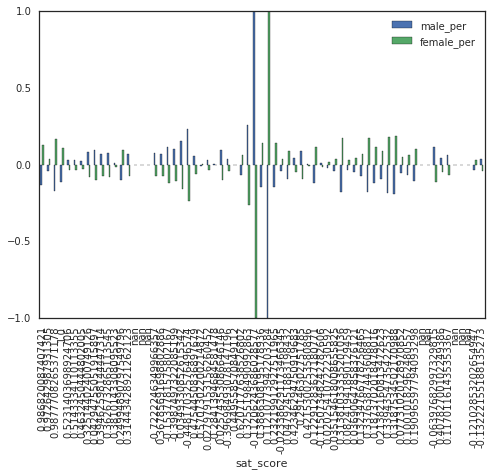

In [223]:
correlations.plot.bar(x='sat_score',y=['male_per', 'female_per'])

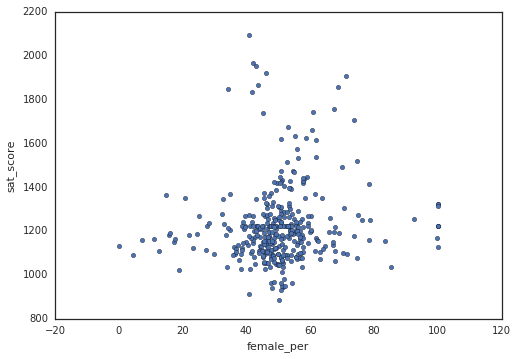

In [239]:
combined.plot.scatter('female_per', 'sat_score')

In [225]:
combined[(combined['female_per']>60) & (combined['sat_score']>1700)]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist
5,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624.0,604.0,628.0,1856.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"525 East Houston Street\nNew York, NY 10002\n(...",40.718962,-73.976066,01
26,02M416,ELEANOR ROOSEVELT HIGH SCHOOL,127,572.0,594.0,592.0,1758.0,Eleanor Roosevelt High School,155.000000,235.000000,...,0,0,0,0,0,0,"411 East 76 Street\nNew York, NY 10021\n(40.77...",40.770116,-73.953379,02
60,03M479,BEACON HIGH SCHOOL,261,577.0,575.0,592.0,1744.0,BEACON SCHOOL,166.000000,197.000000,...,0,0,0,0,0,0,"227-243 West 61St Street\nNew York, NY 10023\n...",40.772158,-73.987797,03
61,03M485,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,531,566.0,564.0,577.0,1707.0,FIORELLO H.LAGUARDIA HS,691.000000,1236.000000,...,0,0,0,0,0,0,"100 Amsterdam Avenue\nNew York, NY 10023\n(40....",40.773671,-73.985269,03
302,25Q525,TOWNSEND HARRIS HIGH SCHOOL,278,621.0,651.0,638.0,1910.0,TOWNSEND HARRIS HS,613.000000,796.000000,...,0,0,0,0,0,0,"149-11 Melbourne Avenue\nFlushing, NY 11367\n(...",40.734408,-73.821417,25


In [230]:
combined['ap_per']=combined['AP Test Takers ']/combined['total_enrollment']

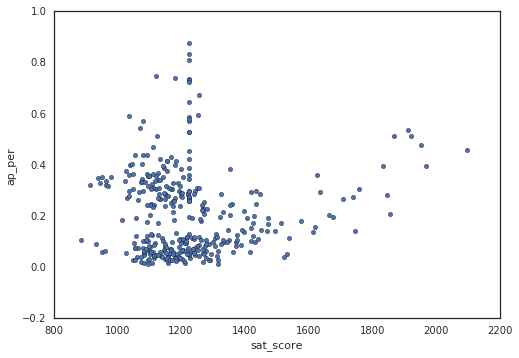

In [231]:
combined.plot.scatter('sat_score', 'ap_per')

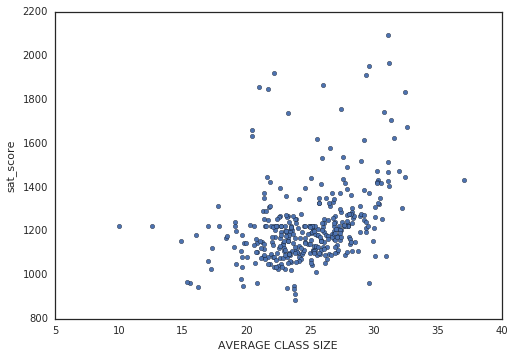

In [237]:
combined.plot.scatter('AVERAGE CLASS SIZE', 'sat_score')

### Analysis of gun death in US

In [7]:
# Analysis of gun deaths in the US from 2012 to 2014
f = open('..\Raw_data\guns.csv')
data = f.read()
data[0:150] # output for 'read' is a list.  Use csv module below

'"","year","month","intent","police","sex","age","race","hispanic","place","education"\n"1",2012,"01","Suicide",0,"M",34,"Asian/Pacific Islander",100,"H'

In [8]:
# Extract header
import csv
f = open('..\Raw_data\guns.csv')
data = list(csv.reader(f))
header = data[0]
data = data[1:]
data[0:2]

[['1',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '34',
  'Asian/Pacific Islander',
  '100',
  'Home',
  'BA+'],
 ['2',
  '2012',
  '01',
  'Suicide',
  '0',
  'F',
  '21',
  'White',
  '100',
  'Street',
  'Some college']]

In [9]:
# Count gun death by year
years = [row[1] for row in data]
year_counts = {}
for i in years:
    if i not in year_counts:
        year_counts[i] = 1
    else:
        year_counts[i] += 1
year_counts

{'2012': 33563, '2013': 33636, '2014': 33599}

In [4]:
# Count gun death by month and year
import datetime
dates = [datetime.datetime(year  =int(row[1]), month = int(row[2]), day = 1) for row in data]
date_counts = {}
for date in dates:
    if date in date_counts:
        date_counts[date] +=1 # a datetime object
    else:
        date_counts[date] =1

In [27]:
sex_counts = {} # number of gun death by sex
for item in data:
    if item[5] in sex_counts:
        sex_counts[item[5]] += 1
    else:
        sex_counts [item[5]] = 1
        
race_counts={} # number of gun death by race
for item in data:
    if item[7] in race_counts:
        race_counts[item[7]] += 1
    else:
        race_counts[item[7]] = 1
print(race_counts)
print(sex_counts)

{'Native American/Native Alaskan': 917, 'White': 66237, 'Hispanic': 9022, 'Black': 23296, 'Asian/Pacific Islander': 1326}
{'F': 14449, 'M': 86349}


In [7]:
import csv
f = open('census.csv', 'r')
census=list(csv.reader(f))

In [18]:
#normalize gun death by race 
mapping = {
     'Asian/Pacific Islander': 15834141,
     'Black': 40250635,
     'Hispanic': 44618105,
     'Native American/Native Alaskan': 3739506,
     'White': 197318956}
race_per_hundredk = {}
for key, val in race_counts.items():
    race_per_hundredk[key]=val/mapping[key]*100000
race_per_hundredk

{'Asian/Pacific Islander': 8.374309664161762,
 'Black': 57.8773477735196,
 'Hispanic': 20.220491210910907,
 'Native American/Native Alaskan': 24.521955573811088,
 'White': 33.56849303419181}

In [33]:
# number of homicide by race
race_count={}
for item in data:
    if item[7] in race_count:
        if item[3]=='Homicide':
            race_count[item[7]] += 1
    else:
        race_count[item[7]] =1
race_count

{'Asian/Pacific Islander': 560,
 'Black': 19511,
 'Hispanic': 5635,
 'Native American/Native Alaskan': 327,
 'White': 9148}

In [34]:
# rate of homecide by race
race_per_hundredk={}
for key, val in race_count.items():
    race_per_hundredk[key] = val/mapping[key]*100000
race_per_hundredk

{'Asian/Pacific Islander': 3.5366616982885275,
 'Black': 48.47376942003524,
 'Hispanic': 12.62940234687242,
 'Native American/Native Alaskan': 8.744470526320857,
 'White': 4.636148591826119}

In [36]:
# number of Accidental death by race
race_count={}
for item in data:
    if item[7] in race_count:
        if item[3] == 'Accidental':
            race_count[item[7]] +=1
    else:
        race_count[item[7]] = 1
race_per_hundredk={}
for key, val in race_count.items():
    race_per_hundredk[key]=val/mapping[key]*100000
race_per_hundredk

{'Asian/Pacific Islander': 0.08210107513884081,
 'Black': 0.8173784090611242,
 'Hispanic': 0.3249801846133985,
 'Native American/Native Alaskan': 0.615054501851314,
 'White': 0.5741972403300167}

### Analysis of Iowa drunk driving using Pandas

## 1. Breath alcohol tests in Ames, Iowa, USA
<p>Ames, Iowa, USA is the home of Iowa State University, a land grant university with over 36,000 students. By comparison, the city of Ames, Iowa, itself only has about 65,000 residents. As with any other college town, Ames has had its fair share of alcohol-related incidents. (For example, Google 'VEISHEA riots 2014'.) We will take a look at some breath alcohol test data from Ames that is published by the State of Iowa.</p>
<p><img style="width:500px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_208/img/usa.jpg"> </p>
<p>The data file 'breath_alcohol_ames.csv' contains 1,556 readings from breath alcohol tests administered by the Ames and Iowa State University Police Departments from January 2013 to December 2017. The columns in this data set are year, month, day, hour, location, gender, Res1, Res2.</p>

In [21]:
# import pandas
import pandas as pd

# read the data into your workspace
ba_data = pd.read_csv('datasets/breath_alcohol_ames.csv')

# quickly inspect the data
print(ba_data.head())

# obtain counts for each year 
ba_year = ba_data['year'].value_counts()
ba_year

   year  month  day  hour location gender   Res1   Res2
0  2017     12   17     1  Ames PD      M  0.046  0.046
1  2017     12   14     3   ISU PD      F  0.121  0.120
2  2017     12   10     5   ISU PD      F  0.068  0.067
3  2017     12   10     3   ISU PD      F  0.077  0.077
4  2017     12    9     2   ISU PD      M  0.085  0.084


2013    397
2014    344
2015    286
2016    269
2017    260
Name: year, dtype: int64

In [3]:
%%nose

import pandas as pd

# # check read file
# def test_breath_alcohol_ames():
#     correct_pulls = pd.read_csv("datasets/breath_alcohol_ames.csv")
#     assert correct_pulls.equals(breath_alcohol_ames), \
#     'Read in "datasets/breath_alcohol_ames.csv" using read_csv().'

# # check head

# # check value counts    
# def test_value_counts():
#     assert len(ba_year) == 5, \
#     'The rows are not arraged by year. Did you select the correct value to count?'

def test_task_1a():
    correct_ba_data = pd.read_csv("datasets/breath_alcohol_ames.csv")
    assert correct_ba_data.equals(ba_data), "The variable `ba_data` should contain the data in `breath_alcohol_ames.csv`"
    
def test_task_1b():
    correct_ba_year = ba_data['year'].value_counts()
    assert correct_ba_year.equals(ba_year), "The variable `ba_year` should contain the counts of years in `ba_data`. Did you use the `value_counts` method?"

2/2 tests passed


## 2. What is the busiest police department in Ames?
<p>There are two police departments in the data set: the Iowa State University Police Department and the Ames Police Department. Which one administers more breathalyzer tests? </p>

In [22]:
# use value_count to tally up the totals for each department
pds = ba_data['location'].value_counts()
pds

ISU PD     940
Ames PD    616
Name: location, dtype: int64

In [5]:
%%nose

# # check value counts    
# def test_value_counts():
#     assert len(ba_year) == 2, \
#     'The rows are not arraged by location. Did you select the correct value to count?'

def test_task_2():
    correct_pds = ba_data['location'].value_counts()
    assert correct_pds.equals(pds), "The variable `pds` should contain the counts of locations in `ba_data`. Did you use the `value_counts` method?"

1/1 tests passed


## 3. Nothing Good Happens after 2am
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_208/img/himym02.jpg" style="float: left;margin:5px 20px 5px 1px;width:300px"></p>
<p>We all know that "nothing good happens after 2am." Thus, there are inevitably some times of the day when breath alcohol tests, especially in a college town like Ames, are most and least common. Which hours of the day have the most and least breathalyzer tests?  </p>

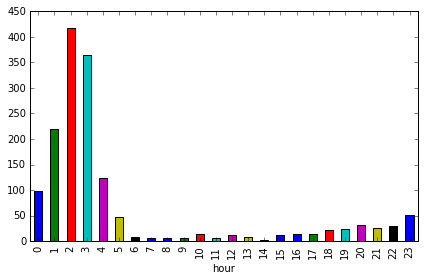

In [23]:
%matplotlib inline

# count by hour and arrange by descending frequency
hourly = ba_data.groupby(['hour']).size()

# create a vertical bar graph of the arrest count by hour in decending frequency
hourly.plot.bar(x=hourly)

In [7]:
%%nose

# groupby, count, and sort values
# check counts    
def test_sort_values():
    assert len(hourly) == 24, \
    'The rows are not arranged by hour. Did you select "hour" to group by?'
    
# no test for plots

1/1 tests passed


## 4. Breathalyzer tests by month
<p>Now that we have discovered which time of day is most common for breath alcohol tests, we will determine which time of the year has the most breathalyzer tests. Which month will have the most recorded tests?</p>

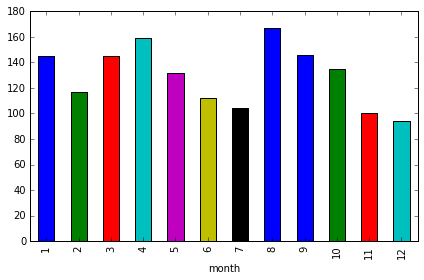

In [24]:
# count by month and arrange by descending frequency
monthly = ba_data.groupby(['month']).size()

# use plot.bar to make the appropriate bar chart
monthly.plot.bar(x='monthly')

In [9]:
%%nose

# groupby, count, and sort values
# check counts    
def test_sort_values():
    assert len(monthly) == 12, \
    'The rows are not arranged by month. Did you select "month" to group by?'
    
# no test for plots

1/1 tests passed


## 5. COLLEGE
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_208/img/PF2081John-Belushi-College-Posters.jpg" style="float: left;margin:5px 20px 5px 1px"> </p>
<p>When we think of (binge) drinking in college towns in America, we usually think of something like this image at the left. And so, one might suspect that breath alcohol tests are given to men more often than women and that men drink more than women. </p>

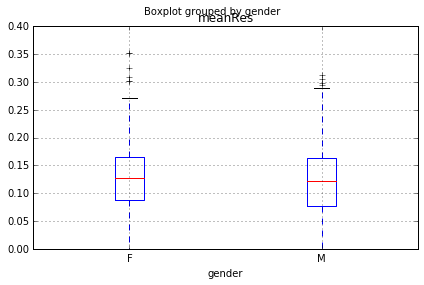

In [25]:
# count by gender
counts_gender = ba_data['gender'].value_counts()
# create a dataset with no NAs in gender 
gen = ba_data.dropna()
# # create a mean test result variable and save as mean_bas
mean_bas = gen.assign(meanRes=(gen.Res1+gen.Res2)/2)
# # create side-by-side boxplots to compare the mean blood alcohol levels of men and women
mean_bas.boxplot(column='meanRes', by='gender')

In [11]:
%%nose

# gender value_counts
def test_task_5b():
    correct_counts_gender = ba_data['gender'].value_counts()
    assert correct_counts_gender.equals(counts_gender), "The variable `counts_gender` should contain the counts of gender in `ba_data`. Did you use the `value_counts` method?"

# dropna
def test_dropna():
    assert len(gen) == 1527, \
    'Did you use dropna() on `gender`?'
    
# create meanRes in mean_bas
def test_month_year_column():
    assert 'meanRes' in mean_bas, \
    "Did you create the `meanRes` column."
    
# no test for plots

3/3 tests passed


## 6. Above the legal limit
<p>In the USA, it is illegal to drive with a blood alcohol concentration (BAC) above 0.08%. This is the case for <a href="https://www.dmv.org/automotive-law/dui.php">all 50 states</a>. Assuming everyone tested in our data was driving (though we have no way of knowing this from the data), if either of the results (<code>Res1</code>, <code>Res2</code>) are above 0.08, the person would be charged with DUI (driving under the influence). </p>

In [26]:
# Filter the data
duis = ba_data[(ba_data.Res1 > 0.08) | (ba_data.Res2 > 0.08)]

# proportion of tests that would have resulted in a DUI
p_dui = duis.shape[0] / ba_data.shape[0]
p_dui

0.7448586118251928

In [13]:
%%nose

# check filter    
def test_duis():
    assert len(duis) == 1159, \
    'Did you use the logical OR operator (|) to filter ba_data?'
    
# check p_dui
def test_p_dui():
    correct_p_dui = duis.shape[0] / ba_data.shape[0]
    assert correct_p_dui == p_dui

2/2 tests passed


## 7. Breathalyzer tests: is there a pattern over time?
<p>We previously saw that 2am is the most common time of day for breathalyzer tests to be administered, and August is the most common month of the year for breathalyzer tests. Now, we look at the weeks in the year over time. </p>

In [27]:
# Create date variable
ba_data['date'] = pd.to_datetime(ba_data[['year', 'month', 'day']])

# Create a week variable
ba_data['week'] = ba_data['date'].dt.week

# Check your work
ba_data.head()

,year,month,day,hour,location,gender,Res1,Res2,date,week
0,2017,12,17,1,Ames PD,M,0.046,0.046,2017-12-17,50
1,2017,12,14,3,ISU PD,F,0.121,0.120,2017-12-14,50
2,2017,12,10,5,ISU PD,F,0.068,0.067,2017-12-10,49
3,2017,12,10,3,ISU PD,F,0.077,0.077,2017-12-10,49
4,2017,12,9,2,ISU PD,M,0.085,0.084,2017-12-09,49


In [15]:
%%nose

# create date var    
def test_date():
    assert 'date' in ba_data, \
    "You did not create the variable for date."
    
# create week var
def test_week():
    assert 'week' in ba_data, \
    "You did not create the variable for week."    

2/2 tests passed


## 8. Looking at timelines
<p>How do the weeks differ over time? One of the most common data visualizations is the time series, a line tracking the changes in a variable over time. We will use the new <code>week</code> variable to look at test frequency over time. We end with a time series plot showing frequency of breathalyzer tests by week in year, with one line for each year. </p>

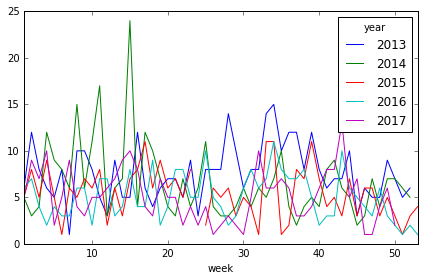

In [28]:
# choose the variables of interest, count and plot 
timeline = ba_data.groupby(['week','year']).count()['Res1']

# unstack and plot
timeline.unstack().plot(legend=True)

In [17]:
%%nose

# check timeline  
def test_timeline():
    assert len(timeline) == 259, \
    'Did you group by week and year?'
    
# plot

1/1 tests passed


## 9. The end of VEISHEA
<p>From <a href="https://en.wikipedia.org/wiki/VEISHEA">Wikipedia</a>: 
"VEISHEA was an annual week-long celebration held each spring on the campus of Iowa State University in Ames, Iowa. The celebration featured an annual parade and many open-house demonstrations of the university facilities and departments. Campus organizations exhibited products, technologies, and held fundraisers for various charity groups. In addition, VEISHEA brought speakers, lecturers, and entertainers to Iowa State. [...] VEISHEA was the largest student-run festival in the nation, bringing in tens of thousands of visitors to the campus each year."</p>
<p>This over 90-year tradition in Ames was <a href="https://www.news.iastate.edu/news/2014/08/07/veisheaend">terminated permanently</a> after <a href="https://www.desmoinesregister.com/story/news/crime-and-courts/2014/04/09/veishea-ames-car-tipping/7495935/">riots in 2014</a>, where drunk celebrators flipped over multiple vehicles and tore light poles down. This was not the first incidence of violence and severe property damage in VEISHEA's history. Did former President Leath make the right decision by cancelling VEISHEA?</p>

In [29]:
## Was it right to permanently cancel VEISHEA? TRUE or FALSE?  
cancelling_VEISHEA_was_right = False

In [19]:
%%nose

def test_bool():
    assert isinstance(cancelling_VEISHEA_was_right, bool), "Did you assign `True` or `False` to `cancelling_VEISHEA_was_right`?"

## The original R version did not have a test regarding opinion.
# def test_opinion():
#     assert cancelling_VEISHEA_was_right == 'False', \
#     'The previous year, 2013, had peak DUIs around week 30, and August has the highest amounts of DUIs per month. VEISHEA was held in April.'

1/1 tests passed


### Is Fandango rating inflation corrected

Analyzing recent movie ratings data to determine whether there has been 
any change in Fandango's rating system after Hickey's analysis to determine
whenter Fandango's rating system has corrected its bias.
https://fivethirtyeight.com/features/fandango-movies-ratings/
https://github.com/fivethirtyeight/data/blob/master/fandango/README.md.

In [62]:
import pandas as pd
fsc = pd.read_csv('fandango_score_comparison.csv')
mr_67 = pd.read_csv('movie_ratings_16_17.csv')
fsc['year'] = fsc['FILM'].str.split(' ').str[-1].str.strip('(').str.strip(')').str.strip('')
fsc['year'] = pd.to_numeric(fsc['year'])
before = fsc[['year', 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
after = mr_67[['year', 'movie','fandango']]
print(before['year'].value_counts())
print(after['year'].value_counts())

2015    129
2014     17
Name: year, dtype: int64
2016    191
2017     23
Name: year, dtype: int64


In [63]:
before = before[before['year']==2015]
after = after[after['year']==2016]
print(before.head(3))
print(after.head(3))

   year                            FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  2015  Avengers: Age of Ultron (2015)             5.0                   4.5   
1  2015               Cinderella (2015)             5.0                   4.5   
2  2015                  Ant-Man (2015)             5.0                   4.5   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
   year                movie  fandango
0  2016  10 Cloverfield Lane       3.5
1  2016             13 Hours       4.5
2  2016  A Cure for Wellness       3.0


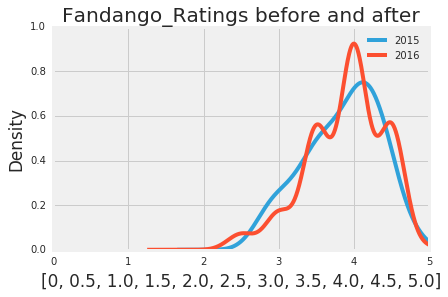

In [104]:
% matplotlib inline
import matplotlib.pyplot as plt
before['Fandango_Ratingvalue'].plot.kde()
after['fandango'].plot.kde(title='Fandango_Ratings before and after')
plt.xlim(0,5)
plt.xlabel([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend(['2015', '2016'],  loc='best')
plt.style.use('fivethirtyeight')

In [79]:
print(before['Fandango_Ratingvalue'].value_counts())
print(after['fandango'].value_counts())

4.1    13
3.9    12
4.2    11
4.3     9
4.5     9
3.6     8
3.7     8
4.4     7
3.4     7
4.0     7
3.5     6
3.2     4
2.9     4
3.3     4
3.8     4
3.0     4
3.1     3
4.8     3
2.8     2
4.6     2
2.7     2
Name: Fandango_Ratingvalue, dtype: int64
4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: fandango, dtype: int64


In [113]:
before_mean = before['Fandango_Ratingvalue'].mean()
after_mean = after['fandango'].mean()
before_median = before['Fandango_Ratingvalue'].median()
after_median = after['fandango'].median()
before_mode = before['Fandango_Ratingvalue'].mode()[0]
after_mode = after['fandango'].mode()[0]

In [114]:
summary = pd.DataFrame()
summary['2015'] = [before_mean, before_median, before_mode]
summary['2016'] = [after_mean, after_median, after_mode]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,3.846512,3.887435
median,3.900000,4.000000
mode,4.100000,4.000000


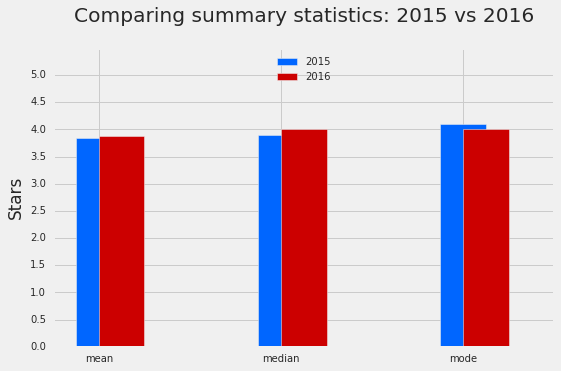

In [120]:
import numpy as np
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

### Job exit survey analysis

This project analyzes the job dissatisfaction based on job exit survey reported from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

In [161]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey2014.csv', na_values = 'Not Stated')
tafe_survey = pd.read_csv('tafe_survey2013.csv', encoding = 'unicode_escape')
print(dete_survey.shape)
print(tafe_survey.shape)

(822, 56)
(702, 72)


#### Drop Unnecessary Columns

In [162]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print(dete_survey_updated.shape)
print(tafe_survey_updated.shape)

(822, 35)
(702, 23)


In [163]:
dete_survey.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [164]:
tafe_survey.head(2)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),2-Jan,2-Jan
1,6.341340e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


#### Clean Column Names

In [165]:
# clean names in dete_survey_updated (using lower letter and replace spaces with '_')
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.rstrip().str.replace(' ', '_')

# rename names in tafe_survey_updated
colmap = {
    'Record ID':'id',
    'CESSATION YEAR':'cease_date',
    'Reason for ceasing employment':'separationtype',
    'Gender. What is your Gender?':'gender',
    'CurrentAge.     Current Age':'age',
    'Employment Type. Employment Type':'employment_status',
    'Classification. Classification':'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service'
}
tafe_survey_updated.rename(columns=colmap, inplace=True)

In [166]:
dete_survey_updated.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [167]:
tafe_survey_updated.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),2-Jan,2-Jan
1,6.341340e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
#checking dete_survey_updated data
d = dete_survey_updated['separationtype'].value_counts(dropna=False)
t = tafe_survey_updated['separationtype'].value_counts(dropna=False)
print(d, '\n')
print(t)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64 

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64


#### Select Resignation Type to Learn About Job Disatisfaction 

In [169]:
sel= dete_survey_updated['separationtype'].str.contains('Resignation')
dete_resignations = dete_survey_updated[sel]
dete_resignations['separationtype'].isnull().value_counts()

False    311
Name: separationtype, dtype: int64

In [170]:
sel= tafe_survey_updated['separationtype']=='Resignation'
tafe_resignations = tafe_survey_updated[sel]
tafe_resignations['separationtype'].isnull().value_counts()

False    340
Name: separationtype, dtype: int64

In [171]:
print(dete_resignations.shape)
print(tafe_resignations.shape)
dete_resignations['cease_date'].value_counts(dropna=False)

(311, 35)
(340, 23)


2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

#### Verify the Dates

In [172]:
# clean dete_resignations['cease_date']
a = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations.loc[:,'cease_date'] = a.astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [173]:
dete_resignations['cease_date'].value_counts(dropna=False,ascending= True)

2006.0      1
2010.0      2
NaN        11
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64

In [174]:
tafe_resignations['cease_date'].value_counts( ascending= True)

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

#### Create a New institute_service Column

In [175]:
date1 = dete_resignations['cease_date']
date2 = dete_resignations['dete_start_date']
dete_resignations.loc[:, 'institute_service'] = date1- date2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [176]:
print(dete_resignations['institute_service'].value_counts(dropna=False))

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
12.0     6
22.0     6
17.0     6
10.0     6
14.0     6
16.0     5
18.0     5
24.0     4
23.0     4
11.0     4
39.0     3
32.0     3
19.0     3
21.0     3
36.0     2
30.0     2
25.0     2
28.0     2
26.0     2
29.0     1
42.0     1
38.0     1
27.0     1
41.0     1
35.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64


In [177]:
print(tafe_resignations['institute_service'].value_counts(dropna=False))

Less than 1 year      73
2-Jan                 64
4-Mar                 63
NaN                   50
6-May                 33
20-Nov                26
10-Jul                21
More than 20 years    10
Name: institute_service, dtype: int64


#### Identify Dissatisfied Employees

In [178]:
a= tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()
b= tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()
print(a)
print(b)

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [179]:
def update_vals(s):
    """
    Convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' 
    columns in the tafe_resignations dataframe to True, False, or NaN values. 
    """
    
    if pd.isnull(s):
        return np.nan
    elif s == '-':
        return False
    else:
        return True
    
tc = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]
tc = tc.applymap(update_vals)

# create new coloumn, tafe_resignations['dissatisfied']
tafe_resignations.loc[:,'dissatisfied'] = tc.any(axis=1, skipna=False)
tafe_resignations_up = dete_resignations.copy()
tafe_resignations['dissatisfied'].value_counts(dropna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [180]:
dete_resignations.columns
dc = dete_resignations[['job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload']]
dc = dc.applymap(update_vals)
dete_resignations.loc[:, 'dissatisfied'] = dc.any(axis=1, skipna = False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

True    311
Name: dissatisfied, dtype: int64

#### Combine the Data and  Clean the Service Column
Because institute_service columns in the two data sets have differnt format, need to categorize them using different functions

In [181]:
# categorize data for dete_resignations['institute_service']

def cat(x):
    if pd.isnull(x):
        return np.nan
    elif x <= 3:
        return 'New'
    elif x <= 6:
        return 'Experienced'
    elif x <= 10:
        return 'Established'
    elif x >= 11:
        return 'Veteran'
dete_resignations_up['service_cat'] = dete_resignations_up['institute_service'].apply(cat)
dete_resignations_up['service_cat'].value_counts()

Veteran        100
New             76
Experienced     56
Established     41
Name: service_cat, dtype: int64

In [182]:
tafe_resignations_up['institute_service'].value_counts()

Less than 1 year      73
2-Jan                 64
4-Mar                 63
6-May                 33
20-Nov                26
10-Jul                21
More than 20 years    10
Name: institute_service, dtype: int64

In [183]:
# categorize data for tafe_resignations['institute_service']
def cat(x):
    if pd.isnull(x):
        return np.nan
    elif (x == 'Less than 1 year') or (x == '2-Jan'):
        return 'New'
    elif (x == '4-Mar') or (x == '6-May'):
        return 'Experienced'
    elif x == '10-Jul':
        return 'Established'
    elif (x == '20-Nov') or (x == 'More than 20 years'):
        return 'Veteran'
tafe_resignations_up['service_cat'] = tafe_resignations_up['institute_service'].apply(cat)
tafe_resignations_up['service_cat'].value_counts(dropna=False)

New            137
Experienced     96
NaN             50
Veteran         36
Established     21
Name: service_cat, dtype: int64

In [184]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)
combined_updated = combined.dropna(thresh = 500, axis=1)
combined_updated['service_cat'].value_counts(dropna=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


New            213
Experienced    152
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [185]:
combined_updated['institute'].value_counts(dropna = False)

TAFE    340
DETE    311
Name: institute, dtype: int64

In [186]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [188]:
combined_updated['dissatisfied'].fillna(True)
combined_updated['service_cat'].value_counts(dropna=False)
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

### 9. Perform Initial Analysis

In [189]:
combined_updated['dissatisfied'].mean()

0.6251944012441679

In [190]:
group = combined_updated.groupby('service_cat')
group['dissatisfied'].sum()
# .mean() function generated error for the group object

service_cat
Established     48
Experienced     80
New            112
Veteran        110
Name: dissatisfied, dtype: int64

In [191]:
pivot_sum = combined_updated.pivot_table(values=['dissatisfied'], \
                             index=['service_cat'],aggfunc =np.sum,\
                             dropna=True, margins=True)
pivot_sum


,dissatisfied
service_cat,
Established,48
Experienced,80
New,112
Veteran,110
All,350


In [192]:
percent = pivot_sum / pivot_sum.loc['All'] *100
print(percent)

             dissatisfied
service_cat              
Established     13.714286
Experienced     22.857143
New             32.000000
Veteran         31.428571
All            100.000000


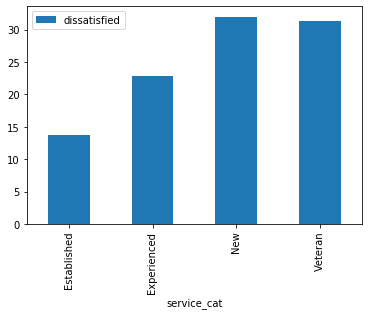

In [193]:
%matplotlib inline
percent[0:4].plot(kind='bar', y='dissatisfied')

In [194]:
combined_updated['age'].value_counts(dropna=False)

NaN              345
41-45             48
46-50             42
36-40             41
26-30             35
51-55             32
21-25             29
31-35             29
56-60             26
61 or older       23
20 or younger      1
Name: age, dtype: int64

In [195]:
def age_cat(x):
    if pd.isnull(x):
        return np.nan
    elif x[0]== '2':
        return '20-30'
    elif x[0]== '3':
        return '30-40'
    elif x[0]== '4':
        return '40-50'
    elif x[0]== '5':
        return '50 & older'
combined_updated['age'] = combined_updated['age'].apply(age_cat)
combined_updated['age'].value_counts()
   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


40-50         90
30-40         70
20-30         65
50 & older    58
Name: age, dtype: int64

In [196]:
age_sum = combined_updated.pivot_table(values=['dissatisfied'], \
                             index=['age'],aggfunc =np.sum,\
                             dropna=True, margins=True)
age_sum


,dissatisfied
age,
20-30,65
30-40,70
40-50,90
50 & older,58
All,283


In [197]:
percent = age_sum / age_sum.loc['All'] *100
print(percent)

            dissatisfied
age                     
20-30          22.968198
30-40          24.734982
40-50          31.802120
50 & older     20.494700
All           100.000000


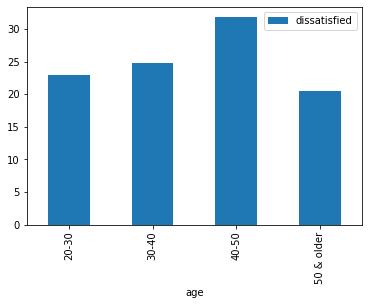

In [198]:
percent[0:4].plot(kind='bar', y='dissatisfied')

### Movie review analysis

In [3]:
# analysis of movie review data
import pandas as pd
reviews = pd.read_csv('fandango_scores.csv')
norm_reviews = reviews[['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']]
norm_reviews.head(5)

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.0,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.5,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.2,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0,3.5


In [4]:
# explore data
fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts().sort_index()
imdb_distribution = norm_reviews['IMDB_norm'].value_counts().sort_index()
print('fandango_distribution:', fandango_distribution, 'imdb_distribution:', imdb_distribution) 

fandango_distribution: 2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64 imdb_distribution: 2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


<BarContainer object of 5 artists>

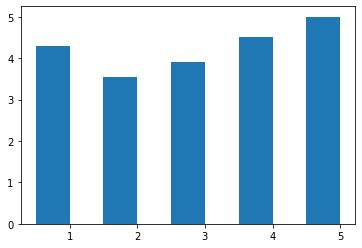

In [9]:
# barplots
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
flg, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)

Text(0.5, 1.0, 'Average User Rating For Avengers: Age of Ultron (2015)')

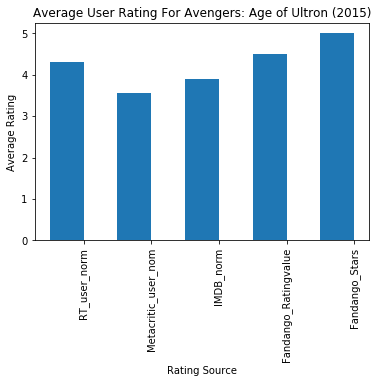

In [10]:
# barplots with specified ticks and axis labels
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)
plt.xlabel("Rating Source")
plt.ylabel("Average Rating")
plt.title("Average User Rating For Avengers: Age of Ultron (2015)")

Text(0.5, 1.0, 'Average User Rating For Avengers: Age of Ultron (2015)')

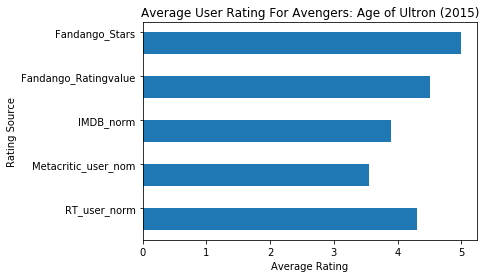

In [11]:
# horizental bar graphs
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)
fig,ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
plt.ylabel("Rating Source")
plt.xlabel("Average Rating")
plt.title("Average User Rating For Avengers: Age of Ultron (2015)")

Text(0.5, 0, 'Rotten Tomatoes')

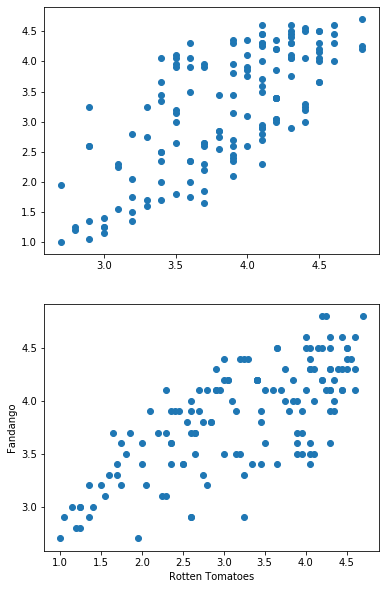

In [18]:
# scatter pots
fig = plt.figure(figsize=(6,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[cols]
ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
plt.xlabel("Fandango")
plt.ylabel("Rotten Tomatoes")
ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
plt.ylabel("Fandango")
plt.xlabel("Rotten Tomatoes")

(0, 50)

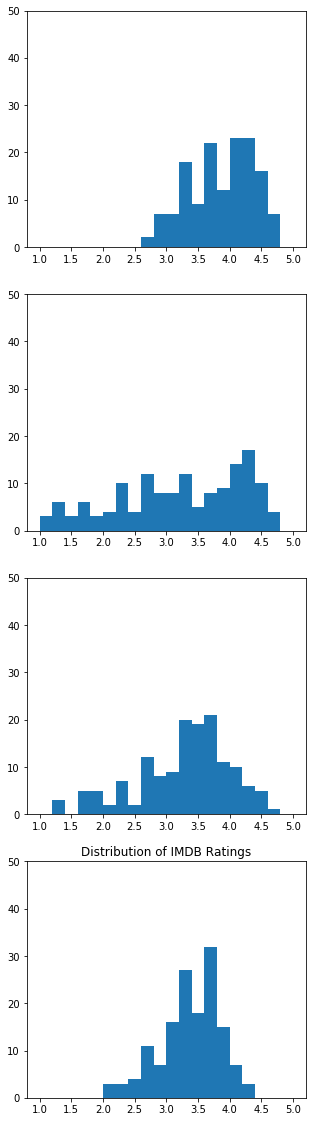

In [11]:
# plotting histograms
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(1,5))
plt.title('Distribution of Fandango Ratings')
ax1.set_ylim(0,50)
ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(1,5))
plt.title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0,50)
ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(1,5))
plt.title('Distribution of Metacritic Ratings')
ax3.set_ylim(0,50)
ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(1,5))
plt.title('Distribution of IMDB Ratings')
ax4.set_ylim(0,50)

(0, 5)

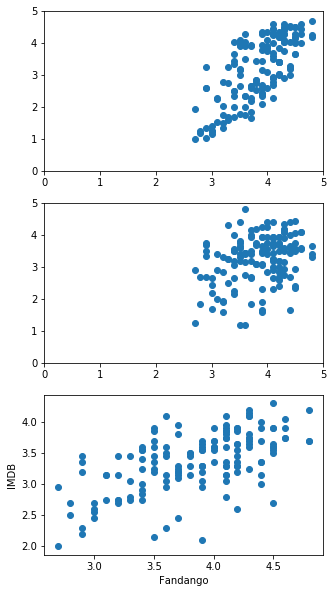

In [12]:
# scatter plots
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['RT_user_norm'])
plt.xlabel("Fandango")
plt.ylabel("Rotten Tomatoes")
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['Metacritic_user_nom'])
plt.xlabel("Fandango")
plt.ylabel("Metacritic")
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'],norm_reviews['IMDB_norm'])
plt.xlabel("Fandango")
plt.ylabel("IMDB")
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

[Text(0,0,'Rotten Tomatoes')]

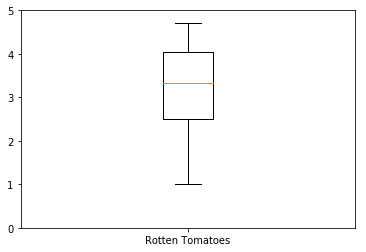

In [13]:
# box plots
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_ylim(0,5)
ax.set_xticklabels(['Rotten Tomatoes']) # needs an iterable object

(0, 5)

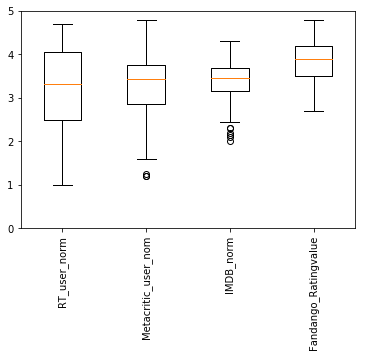

In [14]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
# When selecting multiple columns to pass in to Axes.boxplot(), need .values accessor to return a multi-dimensional numpy array
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)

This project analysis of job outcomes of students who graduated from college 
between 2010 and 2012 based on data obtained by American Community Survey
and cleaned by FiveThirtyEight.  The analysis used various techniques to compare different ways to 
visualize data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
recent_grads=pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [5]:
recent_grads.info()
recent_grads.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
raw_data_count=recent_grads.index
raw_data_count

RangeIndex(start=0, stop=173, step=1)

In [7]:
recent_grads=recent_grads.dropna()

In [8]:
cleaned_data_count=recent_grads.index
cleaned_data_count

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            163, 164, 165, 166, 167, 168, 169, 170, 171, 172],
           dtype='int64', length=172)

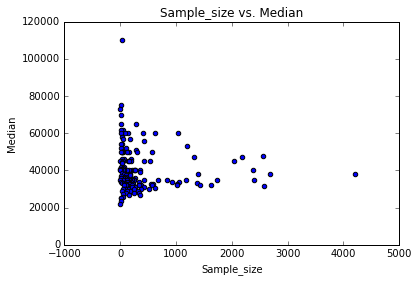

In [9]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample_size vs. Median')

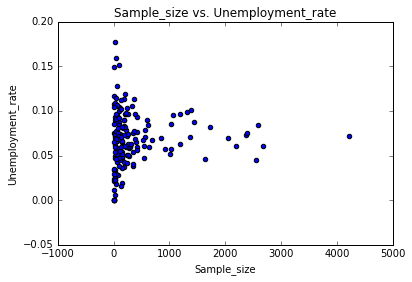

In [10]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample_size vs. Unemployment_rate')

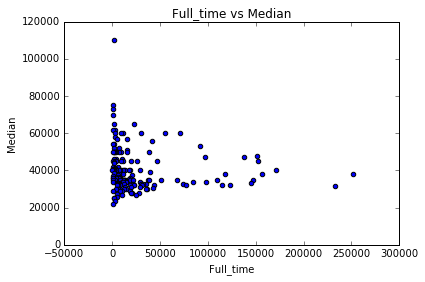

In [11]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full_time vs Median')

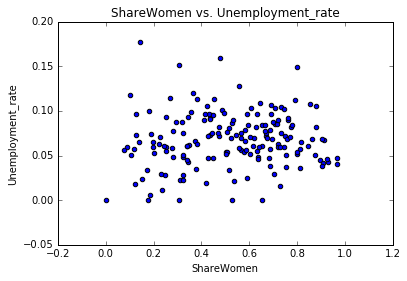

In [12]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen vs. Unemployment_rate')

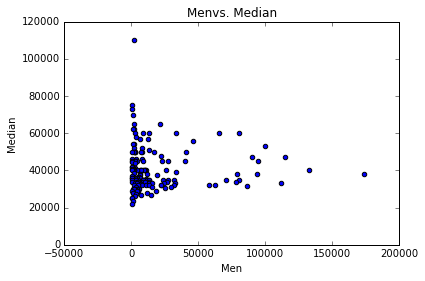

In [13]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs. Median')

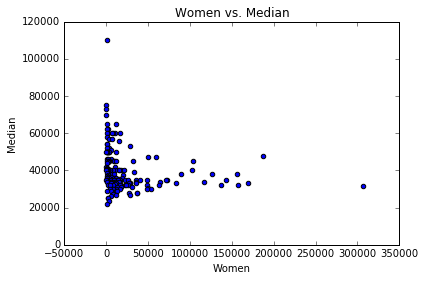

In [14]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs. Median')

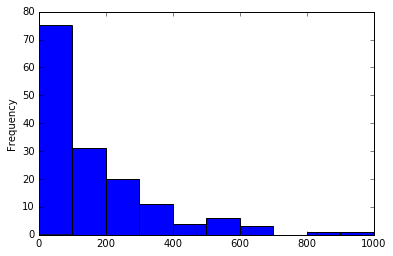

In [54]:
recent_grads['Sample_size'].plot(kind='hist',bins=10, range=(0, 1000))

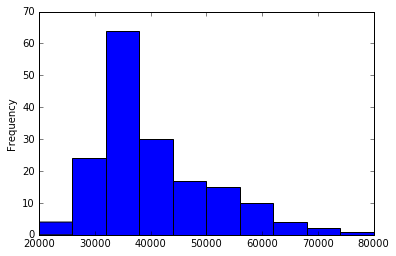

In [62]:
recent_grads['Median'].plot(kind='hist', bins=10, range=(20000, 80000))

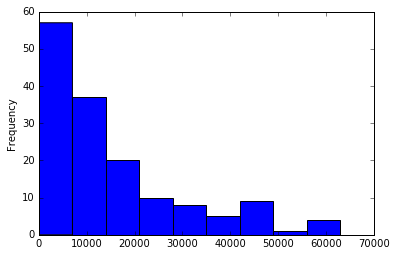

In [52]:
recent_grads['Employed'].plot(kind='hist',bins=10, range=(0, 70000))

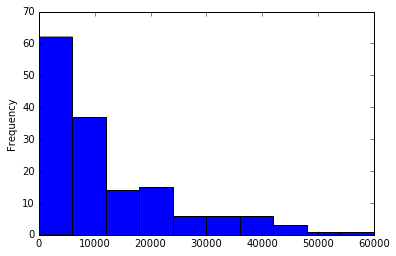

In [51]:
recent_grads['Full_time'].plot(kind='hist',bins=10, range=(0, 60000))

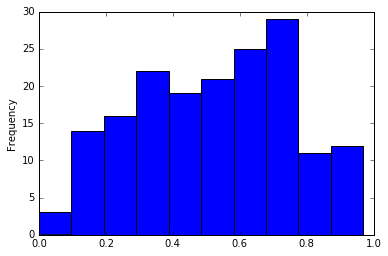

In [19]:
recent_grads['ShareWomen'].plot(kind='hist')

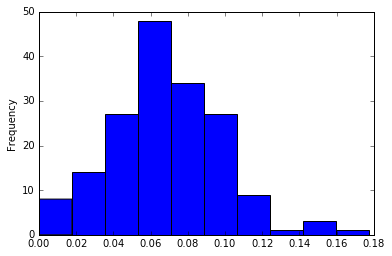

In [20]:
recent_grads['Unemployment_rate'].plot(kind='hist')

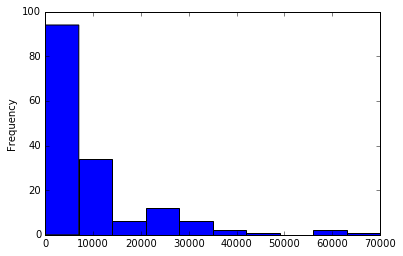

In [59]:
recent_grads['Men'].plot(kind='hist', bins=10, range=(0, 70000))

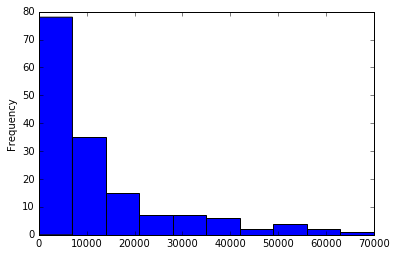

In [60]:
recent_grads['Women'].plot(kind='hist', bins=10, range=(0, 70000))

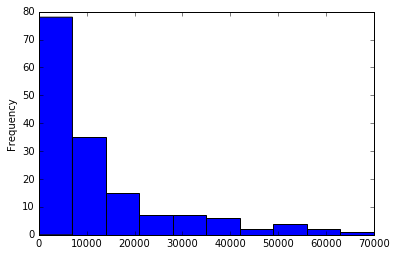

In [74]:
recent_grads['Women'].plot(kind='hist', bins=10, range=(0, 70000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cde600c50>,
      dtype=object)

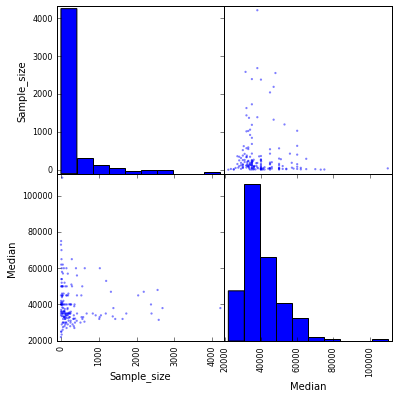

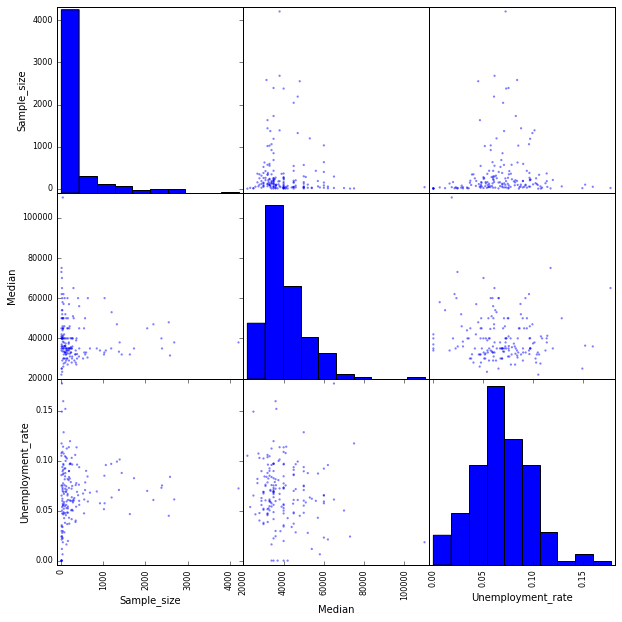

In [66]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

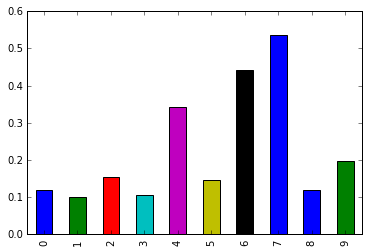

In [68]:
recent_grads[:10]['ShareWomen'].plot(kind='bar')

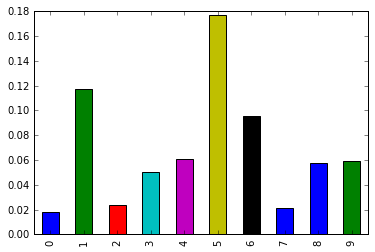

In [69]:
recent_grads[:10]['Unemployment_rate'].plot(kind='bar')

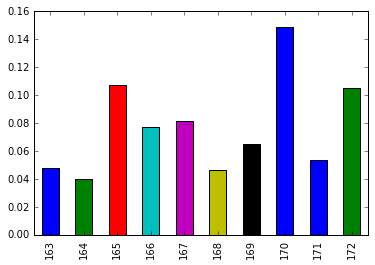

In [71]:
recent_grads[-10:]['Unemployment_rate'].plot(kind='bar')

### visualzing gender gap

6


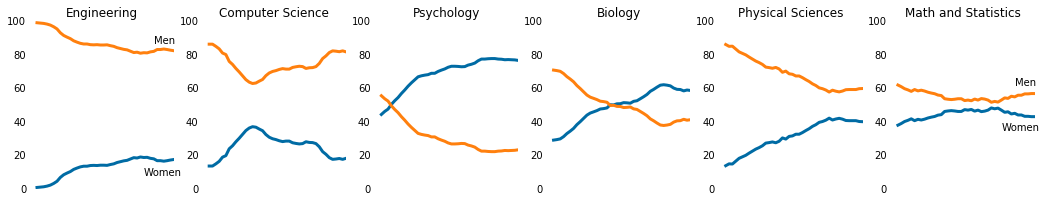

In [49]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
print(len(stem_cats))
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

In [3]:
women_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

In [42]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

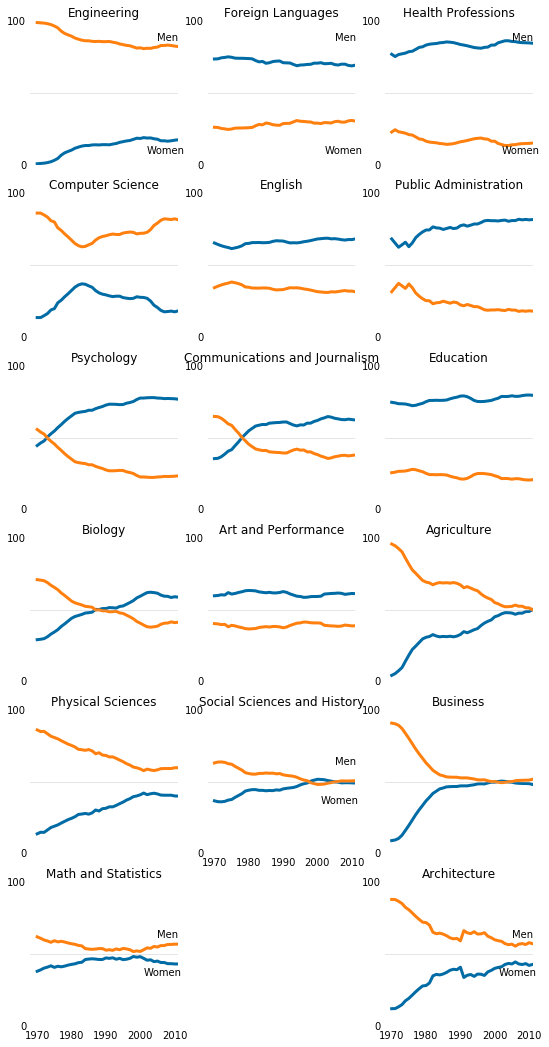

In [55]:
fig = plt.figure(figsize=(9, 18))

for sp in range(0,6):
    cl=sp*3
    ax = fig.add_subplot(6,3,cl+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom='on')
    
    if sp < 5:        
        ax = fig.add_subplot(6,3,cl+2)
        ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_yticks([0,100])
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        ax.set_title(lib_arts_cats[sp])
        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
        if sp == 0:
            ax.text(2005, 87, 'Men')
            ax.text(2002, 8, 'Women')
        elif sp == 4:
            ax.text(2005, 62, 'Men')
            ax.text(2001, 35, 'Women')
            ax.tick_params(labelbottom='on')
        
    ax = fig.add_subplot(6,3,cl+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom='on')
        
plt.savefig('women_degrees.png')

### Visualizing titanic data using seaborn

In [2]:
import pandas as pd

t = pd.read_csv('train.csv')
titanic = t[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].dropna()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


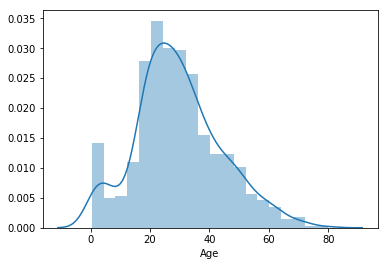

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.distplot(titanic["Age"])  # generating histogram

Text(0.5,0,'Age')

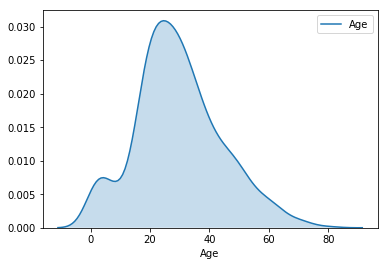

In [6]:
sns.kdeplot(titanic['Age'], shade=True)  # kernel density plot
plt.xlabel('Age')

```Seaborn style sheets
    darkgrid: Coordinate grid displayed, dark background color
    whitegrid: Coordinate grid displayed, white background color
    dark: Coordinate grid hidden, dark background color
    white: Coordinate grid hidden, white background color
    ticks: Coordinate grid hidden, white background color, ticks visible```

Text(0.5,0,'Age')

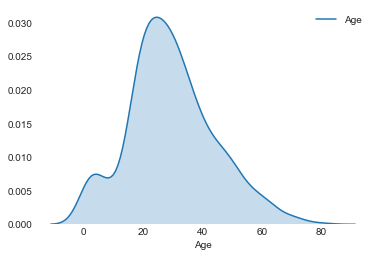

In [7]:
sns.set_style('white')
sns.kdeplot(titanic['Age'], shade=True)
sns.despine(left=True, bottom=True)
plt.xlabel('Age')

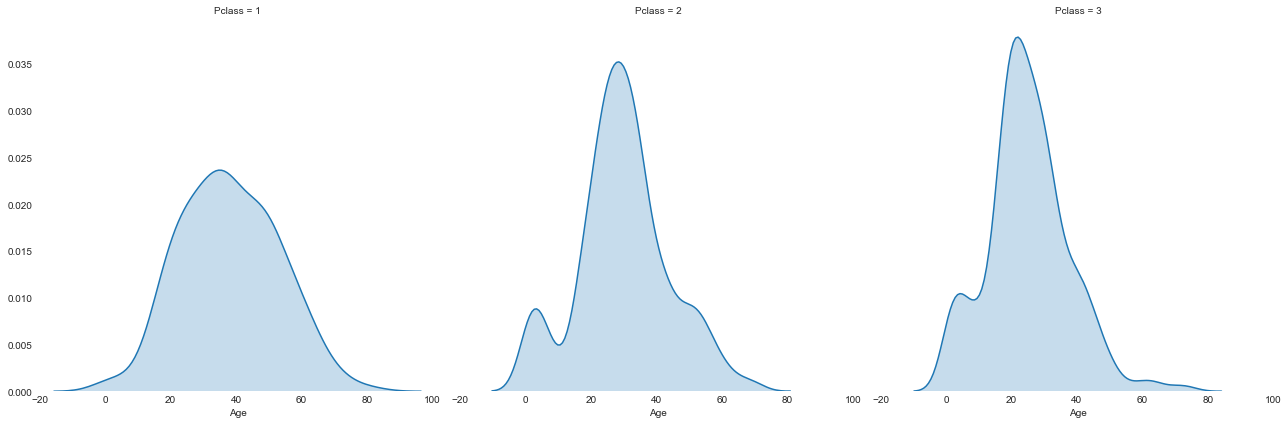

In [8]:
# Use FacetGrid instance to generate three plots on the same row
g = sns.FacetGrid(titanic, col="Pclass", size=6)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)

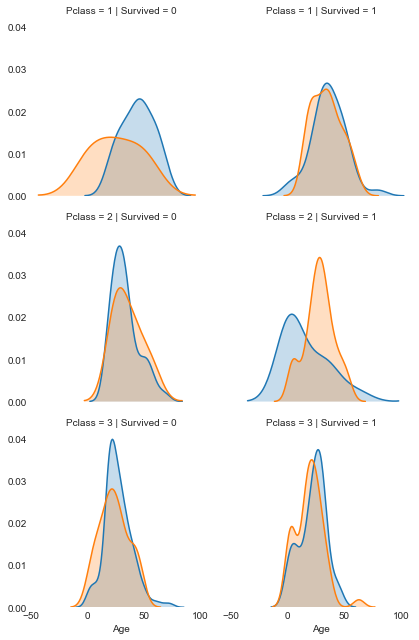

In [9]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue='Sex')
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)

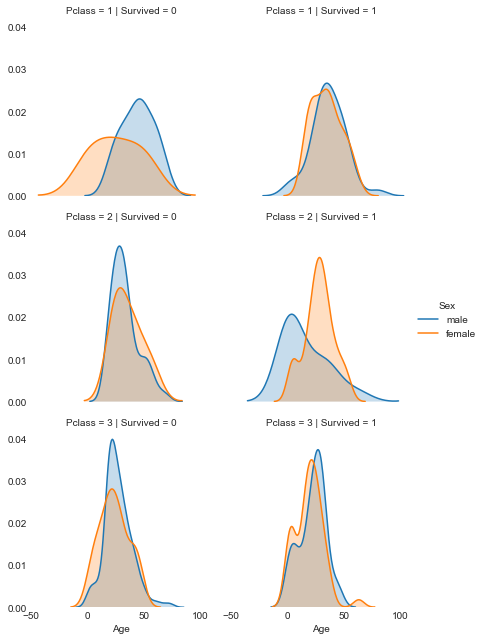

In [10]:
# adding legend to the outside of the plots
g=sns.FacetGrid(titanic, col='Survived', row='Pclass',  hue='Sex', legend_out=True)
g.map(sns.kdeplot, 'Age', shade=True).add_legend()
sns.despine(left=True, bottom=True)

#### visualizing U.S. unemployment data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

unrate = pd.read_csv('unrate.csv')
# convert the DATE column into a Series of datetime values
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate.head(12)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


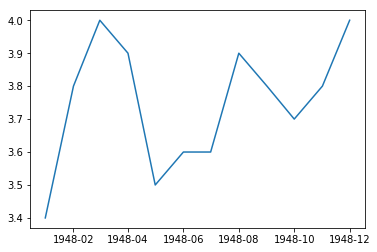

In [10]:
x = unrate['DATE'][:12]
y = unrate['VALUE'][:12]
plt.plot(x,y)

(array([711158., 711218., 711279., 711340., 711401., 711462.]),
 <a list of 6 Text xticklabel objects>)

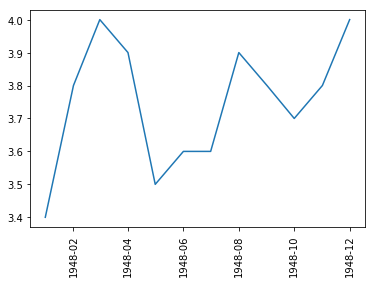

In [11]:
x = unrate['DATE'][:12]
y = unrate['VALUE'][:12]
plt.plot(x,y)
plt.xticks(rotation = 90)

Text(0.5,1,'Monthly Unemployment Trends, 1948')

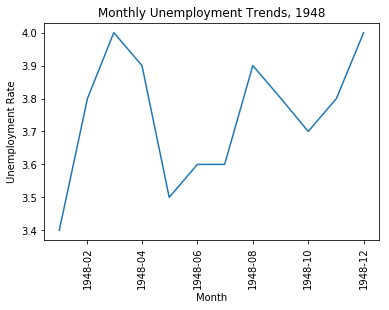

In [12]:
x=unrate['DATE'][:12]
y=unrate['VALUE'][:12]
plt.plot(x,y)
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")

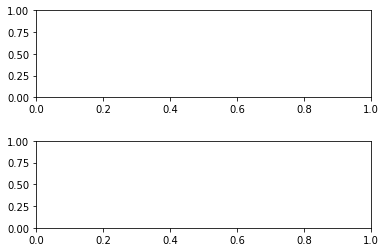

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
fig.subplots_adjust(hspace=.5)

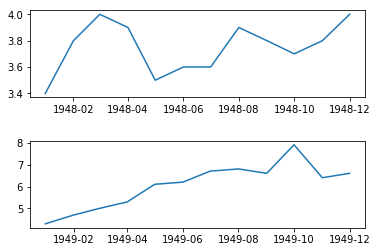

In [23]:
x1 = unrate['DATE'][:12]
y1 = unrate['VALUE'][:12]
x2 = unrate['DATE'][12:24]
y2 = unrate['VALUE'][12:24]
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
fig.subplots_adjust(hspace=.5)
ax1.plot(x1,y1)
ax2.plot(x2,y2)

Text(0.5,1,'Monthly Unemployment Rate, 1949')

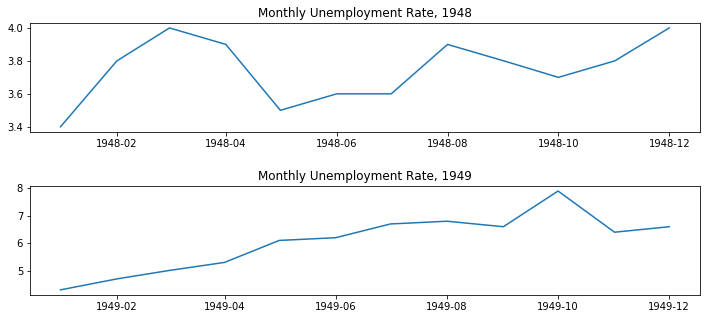

In [24]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
fig.subplots_adjust(hspace=.5)
ax2.set_title('Monthly Unemployment Rate, 1949')

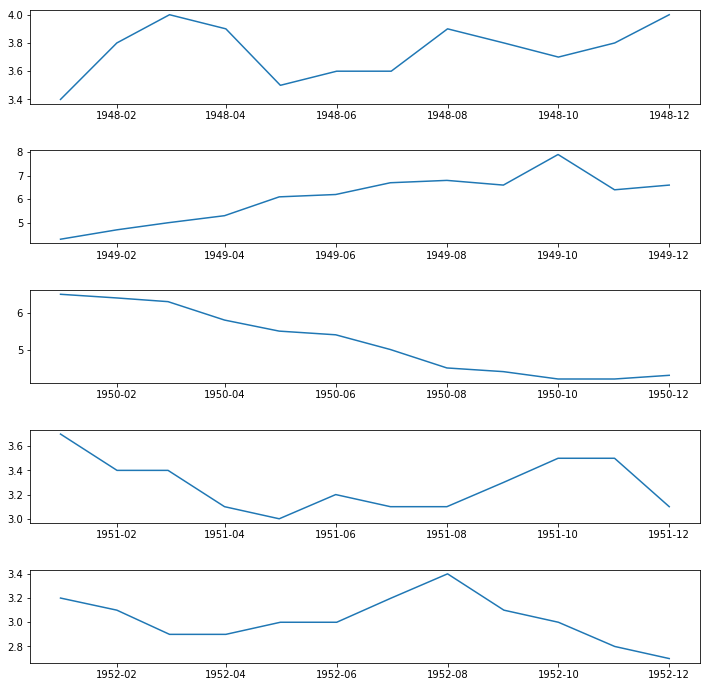

In [25]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)
fig.subplots_adjust(hspace=.5)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax3.plot(unrate[24:36]['DATE'], unrate[24:36]['VALUE'])
ax4.plot(unrate[36:48]['DATE'], unrate[36:48]['VALUE'])
ax5.plot(unrate[48:60]['DATE'], unrate[48:60]['VALUE'])

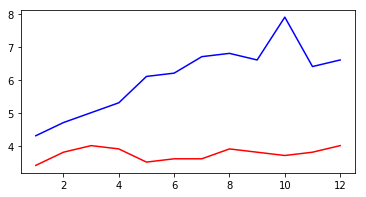

In [18]:
# using month data for multiple years
unrate['MONTH'] = unrate['DATE'].dt.month
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1,1,1)
ax.plot(unrate['MONTH'][0:12], unrate[0:12]['VALUE'], c='red')
ax.plot(unrate['MONTH'][0:12], unrate[12:24]['VALUE'], c='blue')

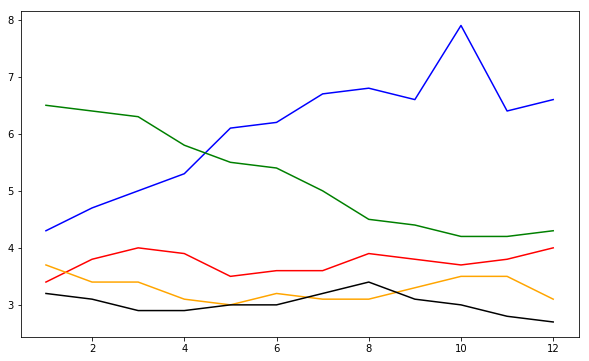

In [19]:
unrate['MONTH'] = unrate['DATE'].dt.month
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(unrate['MONTH'][0:12], unrate[0:12]['VALUE'], c='red')
ax.plot(unrate['MONTH'][0:12], unrate[12:24]['VALUE'], c='blue')
ax.plot(unrate['MONTH'][0:12], unrate[24:36]['VALUE'], c='green')
ax.plot(unrate['MONTH'][0:12], unrate[36:48]['VALUE'], c='orange')
ax.plot(unrate['MONTH'][0:12], unrate[48:60]['VALUE'], c='black')

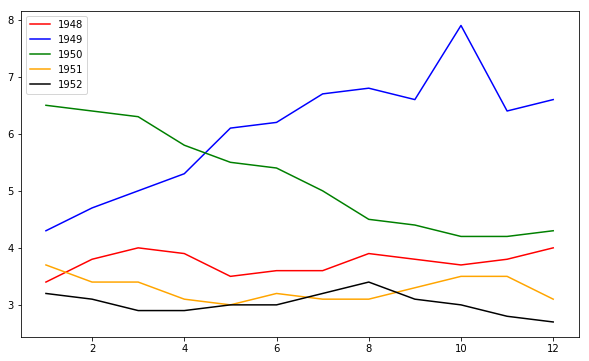

In [20]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
labels = ['1948', '1949', '1950', '1951', '1952']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=labels[i])
    plt.legend(loc='upper left')

Text(0,0.5,'Unemployment Rate, Percent')

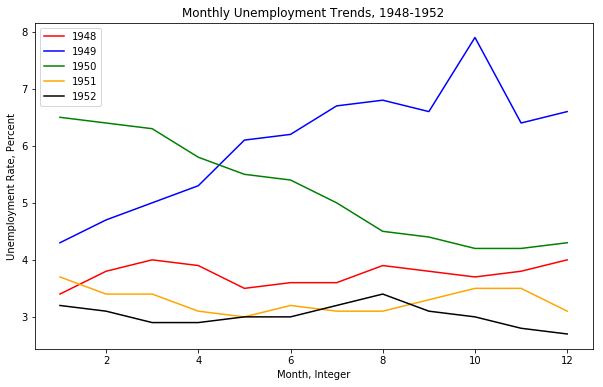

In [21]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")

Based on 2015 and 2016 data, it doesn' tlook like the bia was corrected since the patterns between 2015 an 2016 are similar